In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

In [1]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 39.1 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully u

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/dataset_WWW_22/features.csv', low_memory=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# df.dtypes
df['ns_label']

0           reliable
1           reliable
2           reliable
3         conspiracy
4           reliable
             ...    
376223           NaN
376224      reliable
376225      reliable
376226      reliable
376227      reliable
Name: ns_label, Length: 376228, dtype: object

In [3]:
df['text'] = df['text'].convert_dtypes(convert_string=True)
df['ns_label'] = df['ns_label'].convert_dtypes(convert_string=True)

In [4]:
df = df.dropna(axis=0, how ='any',subset=['text', 'ns_label']) 

In [5]:
df['ns_label']

0           reliable
1           reliable
2           reliable
3         conspiracy
4           reliable
             ...    
376222      reliable
376224      reliable
376225      reliable
376226      reliable
376227      reliable
Name: ns_label, Length: 319186, dtype: string

In [6]:
# Initialize lists
sentences = [] 
labels = []

for item in df['text']:
    sentences.append(item)

for item in df['ns_label']:
    labels.append(item)

In [7]:
sentences[1]

'RT @SenWarren: Black, Latino, Indigenous, &amp; immigrant communities hit hardest by COVID-19 need equitable access to vaccines. @RepPressley,…'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319186 entries, 0 to 376227
Data columns (total 66 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   tweetid                319186 non-null  int64  
 1   userid                 319186 non-null  int64  
 2   screen_name            319186 non-null  object 
 3   date                   319186 non-null  object 
 4   lang                   319186 non-null  object 
 5   location               199274 non-null  object 
 6   place_id               55 non-null      object 
 7   place_url              55 non-null      object 
 8   place_type             55 non-null      object 
 9   place_name             55 non-null      object 
 10  place_full_name        55 non-null      object 
 11  place_country_code     55 non-null      object 
 12  place_country          55 non-null      object 
 13  place_bounding_box     55 non-null      object 
 14  text                   319186 non-nu

In [9]:
# stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "it", "is", "am", "are", "have", "had", "that", "this", "will"]

In [10]:
import numpy as np
import re

def clean_tweet(tweet):
#     if type(tweet) == np.float:
#         return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
#     temp = re.sub("rt"," ", temp)
#     temp = temp.split()
#     temp = [w for w in temp if not w in stopwords]
#     temp = " ".join(word for word in temp)
    return temp

In [11]:
refined_tweets = []
for tweet in sentences:
    cleaned_tweet = clean_tweet(tweet)
    refined_tweets.append(cleaned_tweet)

refined_tweets

['rt    insufficient data  unless you count the millions in the uk who have had it now       german panel a ',
 'rt   black  latino  indigenous   amp  immigrant communities hit hardest by covid 19 need equitable access to vaccines    ',
 'rt   new data from novavax vaccine just showed that uk  amp  esp south african variants are more problematic in real world than ',
 'rt   the  had more accurate and up to date data that it could have used to calculate the rate of severe allergic reacti ',
 'rt   this is exactly the kind of news i did not want to see  novavax vaccine showed nearly 90  efficacy in uk trial  only 49  in sou ',
 'rt   are you kidding me  they should be back of the line  pentagon decides to offer coronavirus vaccines to detainees at gu ',
 'rt   eu commission raid astrazeneca plant    power without accountability is the road to a totalitarian state    as i have sai ',
 'rt   are you kidding me  they should be back of the line  pentagon decides to offer coronavirus vaccines

In [12]:
# sentences

In [13]:
trai_labels = []
i = 1
j = 1
for item in labels:
    if item == 'reliable':
        i = i + 1
        trai_labels.append(0)
    elif item == 'conspiracy':
        trai_labels.append(1)
    elif item == 'unreliable':
        j = j + 1
        trai_labels.append(1)
    else:
        trai_labels.append(item)
print("No. of Reliables:", i)
print("No. of UnReliables:", j)

No. of Reliables: 217280
No. of UnReliables: 51262


In [14]:
training_size = int(len(refined_tweets)-(len(refined_tweets)/10))
print(training_size)
# Split the sentences
training_sentences = refined_tweets[0:training_size]
testing_sentences = refined_tweets[training_size:]

# # Split the labels
training_labels = trai_labels[0:training_size]
testing_labels = trai_labels[training_size:]

287267


In [15]:
training_sentences

['rt    insufficient data  unless you count the millions in the uk who have had it now       german panel a ',
 'rt   black  latino  indigenous   amp  immigrant communities hit hardest by covid 19 need equitable access to vaccines    ',
 'rt   new data from novavax vaccine just showed that uk  amp  esp south african variants are more problematic in real world than ',
 'rt   the  had more accurate and up to date data that it could have used to calculate the rate of severe allergic reacti ',
 'rt   this is exactly the kind of news i did not want to see  novavax vaccine showed nearly 90  efficacy in uk trial  only 49  in sou ',
 'rt   are you kidding me  they should be back of the line  pentagon decides to offer coronavirus vaccines to detainees at gu ',
 'rt   eu commission raid astrazeneca plant    power without accountability is the road to a totalitarian state    as i have sai ',
 'rt   are you kidding me  they should be back of the line  pentagon decides to offer coronavirus vaccines

In [16]:
# For Safety
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# # Parameters
# vocab_size = 50
# max_length = 120
# trunc_type='post'
# oov_tok = "<OOV>"

# # Initialize the Tokenizer class
# tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# # Generate the word index dictionary for the training sentences
# tokenizer.fit_on_texts(training_sentences)
# word_index = tokenizer.word_index

# # Generate and pad the training sequences
# sequences = tokenizer.texts_to_sequences(training_sentences)
# padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# # Generate and pad the test sequences
# testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
# testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 15000
max_length = 60        #if you want maximum sqeuwnce lenght, you can use maxlen = MAX_SEQUENCE_LENGTH
trunc_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(oov_token="<OOV>", lower=False)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
# word_index = tokenizer.word_index
# print("No. of Words:", word_index)
# Print the length of the word index
word_index = tokenizer.word_index
print(f'number of words in word_index: {len(word_index)}')

# print(type(word_index))

# Print the word index
# print(f'word_index: {word_index}')
# print()

# print(max(word_index, key=len))
# max_length = len(max(word_index, key=len))

print("Maximum Length : ", max_length)

# Generate and pad the sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)
# Print a sample headline
index = 1
print(f'Tweet: {training_sentences[index]}')
print(f'padded sequence: {padded[index]}')
print()

# Print dimensions of padded sequences
print(f'shape of padded sequences: {padded.shape}')
print(f'padded sequence: {testing_padded[index]}')

number of words in word_index: 16403
Maximum Length :  60
Tweet: rt   black  latino  indigenous   amp  immigrant communities hit hardest by covid 19 need equitable access to vaccines    
padded sequence: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    2  136 1264 1366   36 3843  997  697 1449   31    9   15  150
 1602  312    5   17]

shape of padded sequences: (287267, 60)
padded sequence: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    2  321  254  135   59  346  619    5 1846  375  124    4   12
  203   28 1398   95]


In [18]:
# sequences

In [19]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [20]:

# import tensorflow as tf
# # Parameters
# embedding_dim = 16
# dense_dim = 6

# # Model Definition with a Flatten layer
# model_flatten = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(dense_dim, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Set the training parameters
# model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# # Print the model summary
# model_flatten.summary()

In [21]:
# from tensorflow import keras
# print(tf.__version__, keras.__version__)

In [22]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)
training_labels

array([0, 0, 0, ..., 1, 0, 0])

In [23]:
padded.shape

(287267, 60)

In [24]:
# NUM_EPOCHS = 5
# BATCH_SIZE = 128

# # Train the model
# history_flatten = model_flatten.fit(padded, training_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

## LSTM

Next, you will use an LSTM. This is slower to train but useful in applications where the order of the tokens is important.

In [ ]:
import tensorflow as tf
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)), #   #dropout=0.2, recurrent_dropout=0.2)
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 16)            240000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 60, 16)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 252,941
Trainable params: 252,941
Non-trai

In [ ]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Train the model
history_lstm = model_lstm.fit(padded, training_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/30
2245/2245 [==============================] - 30s 11ms/step - loss: 0.1057 - accuracy: 0.9610 - val_loss: 0.1635 - val_accuracy: 0.9481
Epoch 2/30
2245/2245 [==============================] - 20s 9ms/step - loss: 0.0224 - accuracy: 0.9939 - val_loss: 0.1711 - val_accuracy: 0.9642
Epoch 3/30
2245/2245 [==============================] - 21s 9ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 0.1497 - val_accuracy: 0.9685
Epoch 4/30
2245/2245 [==============================] - 20s 9ms/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 0.1619 - val_accuracy: 0.9703
Epoch 5/30
2245/2245 [==============================] - 20s 9ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.1698 - val_accuracy: 0.9724
Epoch 6/30
2245/2245 [==============================] - 20s 9ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.1799 - val_accuracy: 0.9749
Epoch 7/30
2245/2245 [==============================] - 20s 9ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.1715 - val_a

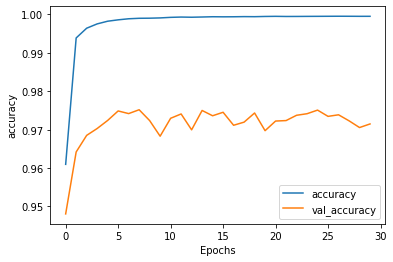

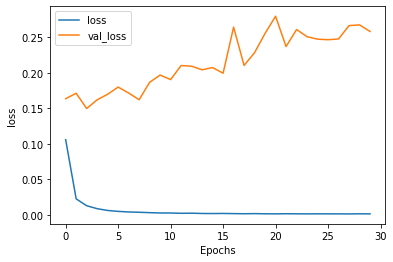

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

In [ ]:
model_lstm.evaluate(testing_padded, testing_labels)

998/998 [==============================] - 4s 4ms/step - loss: 0.2583 - accuracy: 0.9715


[0.25827786326408386, 0.9714903235435486]

## GRU

The *Gated Recurrent Unit* or [GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU) is usually referred to as a simpler version of the LSTM. It can be used in applications where the sequence is important but you want faster results and can sacrifice some accuracy. You will notice in the model summary that it is a bit smaller than the LSTM and it also trains faster by a few seconds.

In [ ]:
import tensorflow as tf

# Parameters
embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 60, 16)            240000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 249,997
Trainable params: 249,997
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 20
BATCH_SIZE = 128

# Train the model
history_gru = model_gru.fit(padded, training_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/20
2245/2245 [==============================] - 24s 9ms/step - loss: 0.0942 - accuracy: 0.9650 - val_loss: 0.1837 - val_accuracy: 0.9522
Epoch 2/20
2245/2245 [==============================] - 19s 9ms/step - loss: 0.0190 - accuracy: 0.9950 - val_loss: 0.1642 - val_accuracy: 0.9615
Epoch 3/20
2245/2245 [==============================] - 19s 9ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 0.1786 - val_accuracy: 0.9671
Epoch 4/20
2245/2245 [==============================] - 19s 9ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.1897 - val_accuracy: 0.9686
Epoch 5/20
2245/2245 [==============================] - 19s 9ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.2124 - val_accuracy: 0.9646
Epoch 6/20
2245/2245 [==============================] - 19s 8ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.2469 - val_accuracy: 0.9666
Epoch 7/20
2245/2245 [==============================] - 19s 8ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.2056 - val_ac

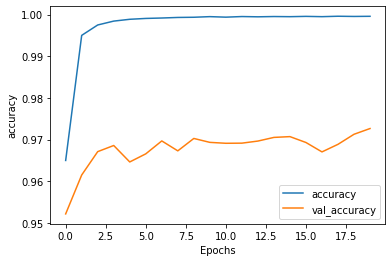

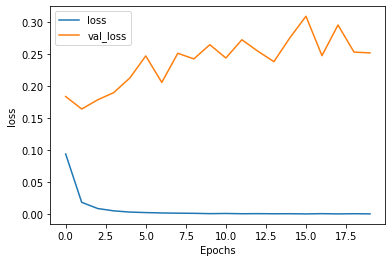

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

In [ ]:
model_gru.evaluate(testing_padded, testing_labels)

998/998 [==============================] - 4s 4ms/step - loss: 0.2516 - accuracy: 0.9726


[0.2516103684902191, 0.9726495146751404]

## Convolution

Lastly, you will use a convolution layer to extract features from your dataset. You will append a [GlobalAveragePooling1d](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D) layer to reduce the results before passing it on to the dense layers. Like the model with `Flatten`, this also trains much faster than the ones using RNN layers like `LSTM` and `GRU`.

In [47]:
import tensorflow as tf
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 60, 16)            240000    
                                                                 
 conv1d_1 (Conv1D)           (None, 56, 128)           10368     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 251,149
Trainable params: 251,149
Non-trainable params: 0
________________________________________________

In [48]:
NUM_EPOCHS = 20
BATCH_SIZE = 128

# Train the model
history_conv = model_conv.fit(padded, training_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/20
2245/2245 [==============================] - 30s 13ms/step - loss: 0.1319 - accuracy: 0.9472 - val_loss: 0.1603 - val_accuracy: 0.9531
Epoch 2/20
2245/2245 [==============================] - 13s 6ms/step - loss: 0.0262 - accuracy: 0.9927 - val_loss: 0.1622 - val_accuracy: 0.9617
Epoch 3/20
2245/2245 [==============================] - 12s 5ms/step - loss: 0.0128 - accuracy: 0.9965 - val_loss: 0.1773 - val_accuracy: 0.9636
Epoch 4/20
2245/2245 [==============================] - 11s 5ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.2068 - val_accuracy: 0.9688
Epoch 5/20
2245/2245 [==============================] - 11s 5ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.2175 - val_accuracy: 0.9719
Epoch 6/20
2245/2245 [==============================] - 11s 5ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.2189 - val_accuracy: 0.9719
Epoch 7/20
2245/2245 [==============================] - 11s 5ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.2340 - val_a

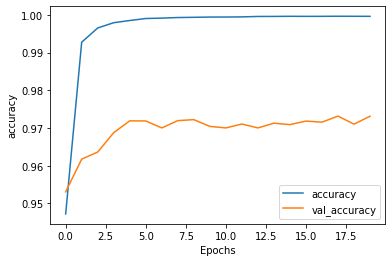

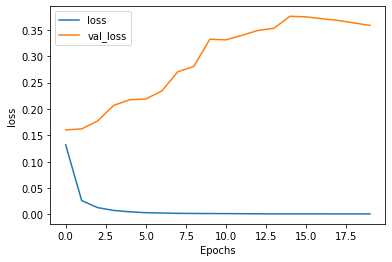

In [51]:
# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')

In [52]:
model_conv.evaluate(testing_padded, testing_labels)

998/998 [==============================] - 2s 2ms/step - loss: 0.3585 - accuracy: 0.9731


[0.35851821303367615, 0.9731194376945496]

In [ ]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model_lstm.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 

(15000, 16)


In [ ]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
i = 1
# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size-1):
    print("Count: ", i)
    word_name = reverse_word_index[word_num]
    word_embedding = embedding_weights[word_num]
#     out_m.write(word_name + "\n")
    print(out_m.write(word_name + "\n"))
    i = i + 1
    if (i == 15000):
        break
    print(out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n"))
    
#         out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")
# Close the files
out_v.close()
out_m.close()

Streaming output truncated to the last 5000 lines.
12
186
Count:  13333
12
183
Count:  13334
12
189
Count:  13335
9
182
Count:  13336
6
184
Count:  13337
12
192
Count:  13338
8
186
Count:  13339
9
187
Count:  13340
7
186
Count:  13341
7
191
Count:  13342
4
184
Count:  13343
9
186
Count:  13344
5
186
Count:  13345
6
187
Count:  13346
12
186
Count:  13347
9
202
Count:  13348
6
196
Count:  13349
11
186
Count:  13350
9
186
Count:  13351
6
183
Count:  13352
12
179
Count:  13353
8
195
Count:  13354
7
193
Count:  13355
7
186
Count:  13356
9
182
Count:  13357
5
186
Count:  13358
11
181
Count:  13359
11
191
Count:  13360
8
178
Count:  13361
6
183
Count:  13362
8
177
Count:  13363
3
186
Count:  13364
9
188
Count:  13365
5
185
Count:  13366
4
189
Count:  13367
9
187
Count:  13368
9
189
Count:  13369
9
186
Count:  13370
5
185
Count:  13371
9
186
Count:  13372
8
185
Count:  13373
8
183
Count:  13374
9
182
Count:  13375
7
179
Count:  13376
7
187
Count:  13377
6
185
Count:  13378
5
182
Count:  13379


In [ ]:
# reverse_word_index.shape

In [ ]:
# # Import files utilities in Colab
# try:
#   from google.colab import files
# except ImportError:
#   pass

# # Download the files
# else:
#   files.download('vecs.tsv')
#   files.download('meta.tsv')

In [ ]:
# import tensorflow as tf
# embedding_dim = 16
# # Build the model
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(6, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Setup the training parameters
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# # Print the model summary
# model.summary()

In [ ]:
# num_epochs = 5

# # Train the model
# model.fit(padded, training_labels, epochs=num_epochs)

In [50]:
model_lstm.save("/content/drive/MyDrive/Colab Notebooks/NLP/Model.h5",save_format="h5")
model_gru.save("/content/drive/MyDrive/Colab Notebooks/NLP/Model_gru.h5",save_format="h5")
model_conv.save("/content/drive/MyDrive/Colab Notebooks/NLP/Model_conv.h5",save_format="h5")

In [ ]:
# model.save("C:\\Users\\hmabu\\Desktop\\NLP")

In [ ]:
restored_keras_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/NLP/Model.h5")

In [ ]:
text = [" Could this be why we are missing so many vaccine doses  Did sell it to the rich  Seems likely. Remember when Trump accused health care workers of stealing PPE How did he even think that Because he would and did"]

In [ ]:
# Generate the word index dictionary
tokenizer.fit_on_texts(text)

# Print the length of the word index
# word_index = tokenizer.word_index
# print(f'number of words in word_index: {len(word_index)}')

# Print the word index
# print(f'word_index: {word_index}')
# print()

# Generate and pad the sequences
seq1 = tokenizer.texts_to_sequences(text)
pad = pad_sequences(seq1,maxlen=60, truncating='post')

In [ ]:
index = 0
print(f'Tweet: {seq1[index]}')
print(f'padded sequence: {pad[index]}')
print()

# Print dimensions of padded sequences
print(f'shape of padded sequences: {pad.shape}')
# print(f'padded sequence: {testing_padded[index]}')

Tweet: [16404, 18, 35, 89, 34, 23, 969, 71, 157, 4, 22, 16405, 2782, 20, 5, 3, 852, 16406, 464, 16407, 112, 16408, 1312, 59, 184, 110, 6, 4101, 16409, 16410, 205, 49, 155, 437, 16, 16411, 49, 114, 11, 205]
padded sequence: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0 16404    18    35    89
    34    23   969    71   157     4    22 16405  2782    20     5     3
   852 16406   464 16407   112 16408  1312    59   184   110     6  4101
 16409 16410   205    49   155   437    16 16411    49   114    11   205]

shape of padded sequences: (1, 60)


In [ ]:
# print(restored_keras_model.predict(pad))

In [ ]:
pred = restored_keras_model.predict(pad)
labels = ['reliable','unreliable']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 1s 646ms/step
[[0.00692291]] reliable


In [ ]:
# testing_padded[0]

In [ ]:
# import pickle

In [ ]:
# pickle.dump(model, open('LSTM.pkl', 'wb'))

In [ ]:
# # Classifier = pickle.load(open('LSTM.pkl', 'rb'))
# Classifier = tf.saved_model.load('LSTM.pkl')